In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import napari
import mrcfile
from pathlib import Path

In [30]:
STEPS_2D = np.array([[-1,0], [1,0], [0,1], [0,-1]])
STEPS_3D = np.array([[-1,0,0], [1,0,0], [0,1,0], [0,-1,0], [0,0,1], [0,0,-1]])
THETA_EACH_90 = [0, 90, 180, 270]

In [20]:
class Brick ():
    
    def __init__(self, pos, density=1):
        self.pos = pos
        self.density = density
        
    def __repr__(self):
        return (f'{self.__class__.__name__}({self.pos})')

In [65]:
class Polyomino2D ():
    
    def __init__(self, seed, size):
        
        random.seed(seed)
        
        self.size = size
        self.bricks = np.empty(size, dtype=np.object)
        self.bricks[0] = Brick([0,0])
        i = 1
        
        while np.count_nonzero(self.bricks) < self.size:
            bricks_pos = [block.pos for block in self.bricks[self.bricks != None]]
            new_brick =  list(random.choice(bricks_pos)
                              +random.choice(STEPS_2D))
    
            if new_brick not in bricks_pos:
                self.bricks[i] = Brick(new_brick)
                i += 1
    
    def rotate_the_block(self, theta=random.choice(THETA_EACH_90)):
        
        c, s = np.cos(theta/180*np.pi), np.sin(theta/180*np.pi)
        R = np.array(((c, -s), (s, c)))
        
        for brick in self.bricks:
            brick_x, brick_y = brick.pos
            brick.pos = np.rint(np.matmul(R, brick.pos)).astype(int)
            
    def visualise_the_2d_block(self, size):
        # TODO visualise in napari
        
        area = np.zeros((size, size), dtype=np.int8)
        center_x, center_y = map(lambda x: round(x/2), area.shape)
        for brick in self.bricks:
            area[brick.pos[0]+center_x][brick.pos[1]+center_y] = 1
        plt.imshow(area)

In [23]:
class Volume2D ():
    
    def __init__(self, shape):
        self.shape = shape
        self.array = np.zeros(shape, dtype='int8')
        
    def fit_a_polyomino_central(self, polyomino):
        placement_pos_x, placement_pos_y = map(lambda x: round(x/2), self.shape)
        for brick in heptamino.bricks:
            self.array[brick.pos[0] + placem§ent_pos_x][brick.pos[1] + placement_pos_y] = 1
        plt.imshow(self.array)
        
    def save_as_mrcfile(self):
        with mrcfile.new('firstVolume.mrc', overwrite=True) as mrc:
            mrc.set_data(self.array)
            viewer = napari.view_image(mrc.data)

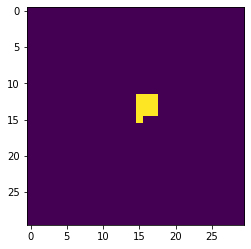

In [59]:
heptamino = Polyomino2D(94, 10)
heptamino.visualise_the_2d_block(30)
first_volume = Volume2D((10, 10))
first_volume.fit_a_polyomino_central(heptamino)

In [64]:
class Polyomino3D ():
    
    def __init__(self, seed, size):
        
        random.seed(seed)
        
        self.size = size
        self.bricks = np.empty(size, dtype=np.object)
        self.bricks[0] = Brick([0,0,0])
        i = 1
        
        while np.count_nonzero(self.bricks) < self.size:
            bricks_pos = [block.pos for block in self.bricks[self.bricks != None]]
            new_brick =  list(random.choice(bricks_pos)+random.choice(STEPS_3D))
    
            if new_brick not in bricks_pos:
                self.bricks[i] = Brick(new_brick)
                i += 1
    
    def rotate_the_block_1_axis(self, axis=0, theta=-1):
        
        if theta==-1:
            theta=random.choice(THETA_EACH_90)/180*np.pi
        else:
            theta=theta/180*np.pi
        
        c, s = np.cos(theta), np.sin(theta)
        
        if axis==0:
            R = np.array(((1, 0, 0), (0, c, -s), (0, s, c)))
        elif axis==1:
            R = np.array(((c, 0, s), (0, 1, 0), (-s, 0, c)))
        elif axis==2:
            R = np.array(((c, -s, 0), (s, c, 0), (0, 0, 1)))
        
        for brick in self.bricks:
            brick_x, brick_y, brick_z = brick.pos
            brick.pos = np.rint(np.matmul(R, brick.pos)).astype(int)
        
    def rotate_the_block_3_axes(self):
        
        self.rotate_the_block_1_axis(axis=0)
        self.rotate_the_block_1_axis(axis=1)
        self.rotate_the_block_1_aixs(axis=2)
            
    def visualise_the_3d_block(self):
        
        # TODO remove magic numbers
        area = np.zeros((50, 50, 50), dtype=np.int8)
        for brick in self.bricks:
            area[brick.pos[0]+25][brick.pos[1]+25, brick.pos[2]+25] = 1
        with mrcfile.new('3d_ployomino_for_visualisation_in_napari.mrc', overwrite=True) as mrc:
            mrc.set_data(area)
            viewer = napari.view_image(area)

In [44]:
class Volume3D ():
    
    def __init__(self, shape):
        self.shape = shape
        self.array = np.zeros(shape, dtype='int8')
        
    def fit_a_polyomino_central(self, polyomino):
        placement_pos_x, placement_pos_y, placement_pos_z = map(lambda x: round(x/2), self.shape)
        for brick in polyomino.bricks:
            self.array[brick.pos[0] + placement_pos_x][brick.pos[1] + placement_pos_y][brick.pos[2] + placement_pos_z] = 1
        
    def save_as_mrcfile(self, output_path:Path):
        mrc = mrcfile.new(output_path, overwrite=True)
        mrc.set_data(self.array)
        mrc.close()
        
    def display_in_napari(self):
        viewer = napari.view_image(self.array)

In [62]:
seeds = [1, 2, 3, 4]

for seed in seeds:
    for theta_x in THETA_EACH_90:
        for theta_y in THETA_EACH_90:
            for theta_z in THETA_EACH_90:
                volume = Volume3D ((15, 20, 30))
                polyomino_to_rotate = Polyomino3D(seed, 15)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=0, theta=theta_z)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=1, theta=theta_x)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=2, theta=theta_y)
                volume.fit_a_polyomino_central(polyomino_to_rotate)
                volume.save_as_mrcfile(Path(f'rotated_polyominos/{seed}_{theta_z}_{theta_x}_{theta_y}.mrc'))

In [46]:
mrcfile.validate(Path('rotated_polyominos/10_0_0_0.mrc'))

True

In [66]:
with mrcfile.open(Path('rotated_polyominos/1_0_0_0.mrc')) as mrc:
    viewer = napari.view_image(mrc.data)

## Create a 2D Polyomino and visualise all 90 degrees rotations

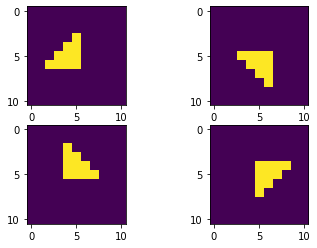

In [152]:
heptamino = Polyomino(7, 10)
fig = plt.figure()

for i in range(1, 5):
    rotation = THETA_EACH_90[i-1]
    ax = fig.add_subplot(2, 2, i)
    heptamino.rotate_the_block(rotation)
    heptamino.visualise_the_2d_block()

## Exploring mrcfile library & displaying mrc in napari

In [33]:
# Displaying a 2D mrcfile
with mrcfile.new('tmp2d.mrc', overwrite=True) as mrc:
    mrc.set_data(np.zeros((5, 5), dtype=np.int8))
    mrc.data[1:4,1:4] = 10
    mrc.data[2:3,2:3] = 30
    viewer = napari.view_image(mrc.data)

In [35]:
# Displaying a 3D mrcfile
with mrcfile.new('tmp3d.mrc', overwrite=True) as mrc:
    mrc.set_data(np.zeros((5, 5, 5), dtype=np.int8))
    mrc.data[1:4,1:4,1:4] = 10
    mrc.data[2:3,2:3,2:3] = 30
    viewer = napari.view_image(mrc.data)

In [ ]:
# This will be an instance method of the Volume3D class
def fit_a_polyomino_non_central(self, polyomino, allow_for_cuts = True):

    placed = False
    while placed == False:

        placement_pos_x, placement_pos_y = random.randint(0, self.shape[0]-1), random.randint(0, self.shape[1]-1)
        coords = [brick.pos + np.array([placement_pos_x, placement_pos_y]) for brick in heptamino.bricks]
        ratios = coords / np.array(self.shape)

        if np.all([np.logical_and(position>=0, position<1) for position in ratios]):
            for brick in heptamino.bricks:
                self.array[brick.pos[0] + placement_pos_x, brick.pos[1] + placement_pos_y] = 1
            placed = True
            plt.imshow(firs.array)
        else:
            print(False)